### House Rent in Major Brazilian Cities (EDA)

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset

df = pd.read_csv(r'C:\Users\ayush\OneDrive\Documents\Data Science\programming\houses_to_rent_v2.csv')

In [3]:
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [4]:
df.shape

(10692, 13)

In [5]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
## No NULL Values!!

In [7]:
#Data Types
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [8]:
#Floor seems to be have an object data type but rather should be numeric. Let's check the values

df["floor"].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [9]:
# Apparently, there's a "-", which indicates 0 floors. So, we replace the "-" with a 0.

df["floor"] = df["floor"].replace(["-"], 0)

In [10]:
# Change the datatype to numeric

df["floor"] = df["floor"].apply(pd.to_numeric)

In [11]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int64
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [12]:
# Checking unique values for the categorical variables

df["city"].unique(), df["animal"].unique(), df["furniture"].unique()

(array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
        'Belo Horizonte'], dtype=object),
 array(['acept', 'not acept'], dtype=object),
 array(['furnished', 'not furnished'], dtype=object))

In [13]:
df["animal"] = df["animal"].map({"acept":"accepted", "not acept": "not accepted"})

#### Descriptive Statistics of the Dataset

In [14]:
df.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


##### Seems like there's a huge difference between the max and min values, so there will be some outliers. It can be explored more going forward. For example, having 301 floors in a residential building seems to be an outlier. Rent amount of 45,000, and property tax of 313,700 is also off from the general trend. 


##### Also, the difference between the mean and the median shows that the data is skewed. 

In [15]:
# Mean rent grouped by city
mean_rent = df.groupby(["city"])["rent amount (R$)"].mean()

In [16]:
mean_rent = mean_rent.sort_values(ascending = True)

In [17]:
mean_rent

city
Porto Alegre      2337.699916
Campinas          2364.290739
Rio de Janeiro    3232.904064
Belo Horizonte    3664.127981
São Paulo         4652.793783
Name: rent amount (R$), dtype: float64

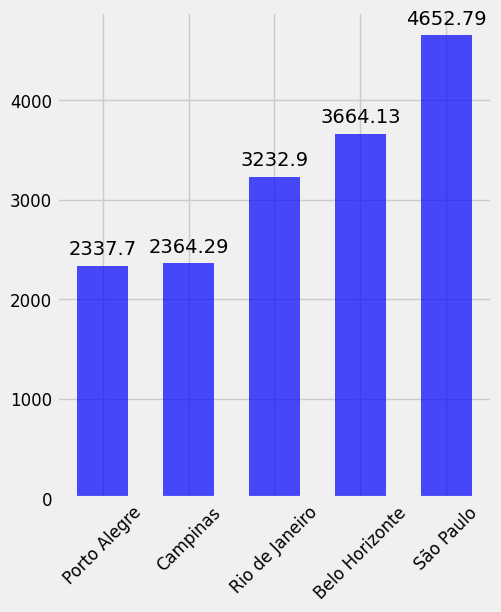

In [48]:
# Bar Chart showing the mean rent for different cities in Brazil

fig = plt.figure(figsize=(5, 6))
plt.style.use('fivethirtyeight')

bar = plt.bar(mean_rent.index, mean_rent.values, color = "blue", linewidth = 1, alpha = 0.7
       , width=0.6)
plt.xticks(fontsize=12, rotation = 45)  
plt.yticks(fontsize=12)
for p in bar:
   height = p.get_height()
   plt.annotate('{}'.format(round(height,2)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 5), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')


##### Sao Paulo has the highest average rent amount, whereas Porto Alegre has the lowest.

In [19]:
mean_total = df.groupby(["city"])["total (R$)"].mean()

In [20]:
mean_total = mean_total.sort_values(ascending = True)

In [21]:
mean_total

city
Porto Alegre      2989.782900
Campinas          3173.276671
Rio de Janeiro    4611.684877
Belo Horizonte    6315.242448
São Paulo         6380.831833
Name: total (R$), dtype: float64

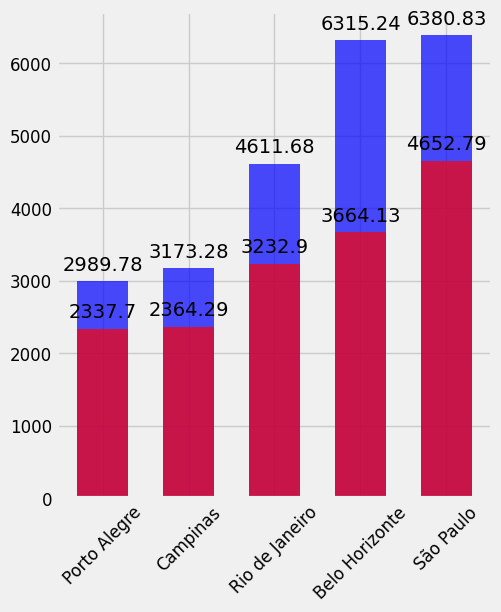

In [22]:
fig = plt.figure(figsize=(5, 6))
plt.style.use('fivethirtyeight')

bar = plt.bar(mean_total.index, mean_total.values, color = "blue", linewidth = 1, alpha = 0.7
       , width=0.6)
bar1 = plt.bar(mean_rent.index, mean_rent.values, color = "red", linewidth = 1, alpha = 0.7
       , width=0.6)
plt.xticks(fontsize=12, rotation = 45)  
plt.yticks(fontsize=12)
for p in bar:
   height = p.get_height()
   plt.annotate('{}'.format(round(height,2)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 5), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

    
for p in bar1:
   height = p.get_height()
   plt.annotate('{}'.format(round(height,2)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 5), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    

##### Here's a breakdown of the total amount vs just the rent amount for different cities. It is evident that Belo Horizonte has a lot of other expenses than just the rent like, fire insurance, property tax, etc. as compared to other cities.

([<matplotlib.patches.Wedge at 0x24ae9c09b20>,
 [Text(-0.38302223493329296, 0.3213937889049901, 'accepted'),
  Text(0.3830222499788216, -0.3213937709744249, 'not accepted')],
 [Text(-0.9192533638399031, 0.7713450933719762, '77.8%\n(8316)'),
  Text(0.9192533999491719, -0.7713450503386198, '22.2%\n(2376)')])

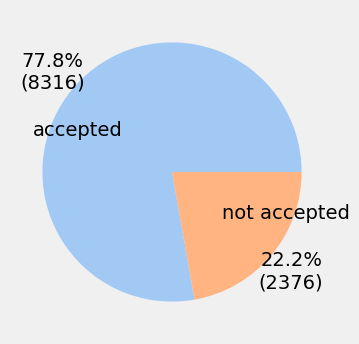

In [49]:
# Pie chart showing the percentage of data points that allow or do not allow pets.

plt.figure(figsize = (5,4))
colors = sns.color_palette('pastel')[0:2]
animal_counts = df["animal"].value_counts()
plt.pie(df["animal"].value_counts()
        , labels = df["animal"].value_counts().index, 
        autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*animal_counts.sum())})",
        colors = colors,
        pctdistance = 1.2,
        labeldistance  =0.5,)

([<matplotlib.patches.Wedge at 0x24ae9a4e9a0>,
 [Text(-0.36044460410933227, 0.34652516123431315, 'not furnished'),
  Text(0.36044458788731815, -0.34652517810794264, 'furnished')],
 [Text(-0.8650670498623975, 0.8316603869623516, '75.6%\n(8085)'),
  Text(0.8650670109295635, -0.8316604274590623, '24.4%\n(2605)')])

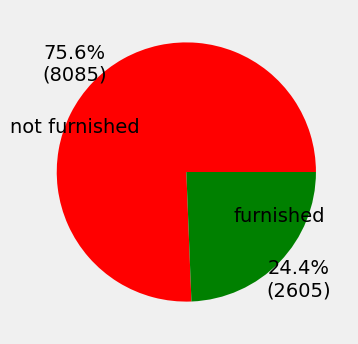

In [50]:
# Pie chart showing the percentage of data points that are furnished or not furnished

plt.figure(figsize = (5,4))
colors = ["red", "green"]
furn_counts = df["furniture"].value_counts()
plt.pie(df["furniture"].value_counts()
        , labels = df["furniture"].value_counts().index, 
        autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*furn_counts.sum())})",
        colors = colors,
        pctdistance = 1.2,
        labeldistance  =0.5,)

##### The dataset is a little imbalanced here, so we might want to use balancing techniques like SMOTE before building a model that uses the above two features.

In [25]:
mean_rent_furn = df.groupby(["furniture"])["rent amount (R$)"].mean()

In [26]:
mean_rent_furn = mean_rent_furn.sort_values(ascending = True)

In [27]:
mean_rent_an = df.groupby(["animal"])["rent amount (R$)"].mean()

In [28]:
mean_rent_an = mean_rent_an.sort_values(ascending = True)

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000')])

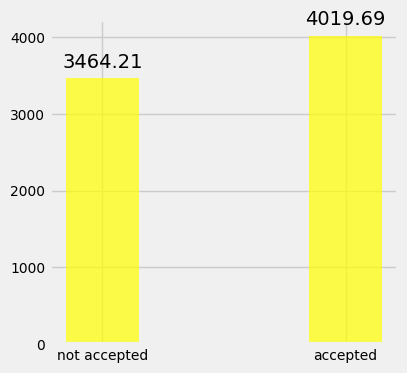

In [79]:
# Mean rent of houses that allow or do not allow pets

plt.figure(figsize = (4,4))
bar2 = plt.bar(mean_rent_an.index, mean_rent_an.values, color = "yellow", linewidth = 1, alpha = 0.7
       , width=0.3)

for p in bar2:
   height = p.get_height()
   plt.annotate('{}'.format(round(height,2)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 5), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
plt.xticks(size = 10)
plt.yticks(size = 10)

##### Houses that allow pets have a higher rent

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000')])

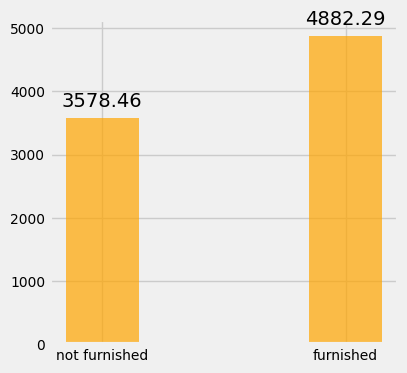

In [78]:
# Mean rent of houses that are furnished or not furnished

plt.figure(figsize = (4,4))
bar3 = plt.bar(mean_rent_furn.index, mean_rent_furn.values, color = "orange", linewidth = 1, alpha = 0.7
       , width=0.3)

for p in bar3:
   height = p.get_height()
   plt.annotate('{}'.format(round(height,2)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 5), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    
plt.xticks(size = 10)
plt.yticks(size = 10)

##### As expected, houses that are furnished have significantly higher rent than those that are not furnished

In [31]:
#Mean area of houses for different cities

mean_ = df.groupby(["city"])["area"].mean()

In [32]:
round(mean_,2)

city
Belo Horizonte    207.41
Campinas          137.56
Porto Alegre      103.61
Rio de Janeiro    105.35
São Paulo         158.90
Name: area, dtype: float64

In [33]:
# Median number of rooms, baths, parking spaces, and floors for houses in different cities
median_ = df.groupby(["city"])["rooms", "bathroom", "parking spaces", "floor"].median()

C:\Users\ayush\AppData\Local\Temp\ipykernel_5060\1474443253.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  median_ = df.groupby(["city"])["rooms", "bathroom", "parking spaces", "floor"].median()


In [34]:
median_

,rooms,bathroom,parking spaces,floor
city,,,,
Belo Horizonte,3.0,2.0,2.0,2.0
Campinas,2.0,1.0,1.0,3.0
Porto Alegre,2.0,1.0,1.0,3.0
Rio de Janeiro,2.0,2.0,1.0,4.0
São Paulo,3.0,2.0,1.0,4.0


C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]),
 [Text(0, -200000.0, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 200000.0, '0.2'),
  Text(0, 400000.0, '0.4'),
  Text(0, 600000.0, '0.6'),
  Text(0, 800000.0, '0.8'),
  Text(0, 1000000.0, '1.0'),
  Text(0, 1200000.0, '1.2')])

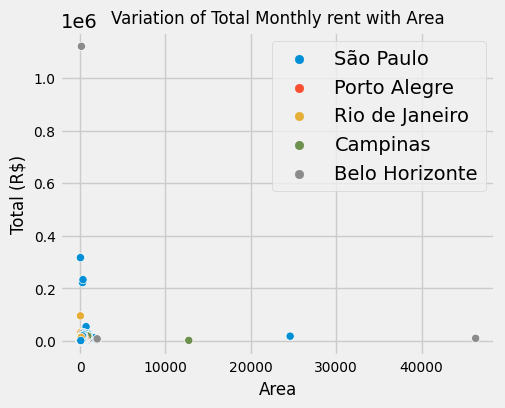

In [77]:
# Scatter plot showing variation of Total Monthly rent with Area for different cities.

plt.figure(figsize = (5,4))
sns.scatterplot(df["area"], df["total (R$)"], s = 35, hue = df["city"])
plt.title("Variation of Total Monthly rent with Area", size = 12)
plt.legend()
plt.xlabel("Area", size = 12)
plt.ylabel("Total (R$)", size = 12)
plt.xticks(size = 10)
plt.yticks(size = 10)

##### Surprisingly, there are some houses with a very less rent and very large area and some with a small area and a very high rent. This could be an error.

In [36]:
df[df["area"]>10000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2397,Belo Horizonte,46335,4,8,5,11,accepted,furnished,960,8500,646,114,10220
5915,São Paulo,24606,5,4,4,12,accepted,not furnished,2254,8100,7859,103,18320
9241,Campinas,12732,3,2,0,3,accepted,not furnished,700,1600,96,21,2417


In [37]:
df[df["total (R$)"]>20000].sort_values("total (R$)", ascending = False)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
6979,Belo Horizonte,155,1,4,0,4,not accepted,not furnished,1117000,2790,64,38,1120000
255,Belo Horizonte,155,1,4,0,4,not accepted,not furnished,1117000,2790,64,38,1120000
6645,São Paulo,42,1,2,1,6,not accepted,not furnished,690,2500,313700,32,316900
6230,São Paulo,340,5,4,2,7,accepted,not furnished,220000,12000,1000,153,233200
2859,São Paulo,285,4,5,4,6,accepted,furnished,200000,20000,1834,254,222100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,São Paulo,420,4,4,4,7,accepted,not furnished,6000,12000,2000,153,20150
1758,São Paulo,260,4,4,3,11,not accepted,not furnished,3500,15000,1417,191,20110
1580,Belo Horizonte,312,4,5,4,15,accepted,not furnished,3150,15000,1747,200,20100
5884,São Paulo,260,4,4,4,4,accepted,not furnished,3247,15000,1589,191,20030


C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


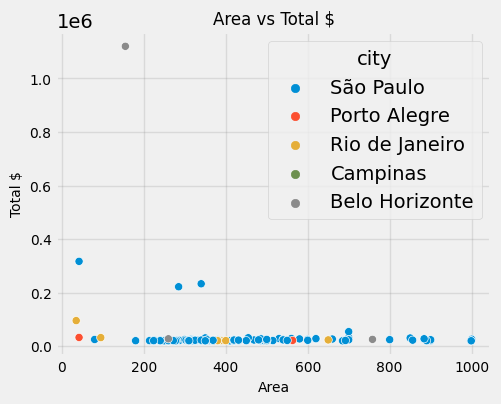

In [76]:
# Scatter plot showing variation of Total Monthly rent with Area for different cities (for total rent > $20000)

plt.figure(figsize = (5,4))
plt.style.use('fivethirtyeight')
sns.scatterplot(df["area"], df["total (R$)"].where(df["total (R$)"]>20000), s=35, hue = df["city"])
plt.xlabel("Area", size = 10, color = "black")
plt.ylabel("Total $", size = 10, color = "black")
plt.title("Area vs Total $", size =12, color = "black")
plt.xticks(color = "black")
plt.yticks(color = "black")
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.grid(color = "grey", alpha = 0.2)
plt.show()

##### Sao Paulo, being the biggest city in Brazil, has houses with different areas and differet rent. But there seem to be less outliers for the rent data for Sao Paulo. For cities like Belo Horizonte, a rent of 1,000,000 is an error.

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


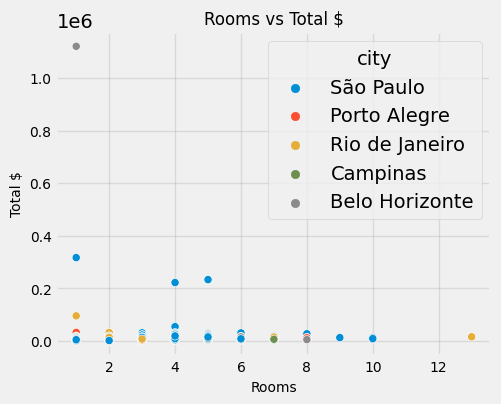

In [75]:
# Scatter plot showing variation of Total Monthly rent with Room for different cities 

plt.figure(figsize = (5,4))
sns.scatterplot(df["rooms"], df["total (R$)"], s = 35, hue = df["city"])
plt.xlabel("Rooms", size = 10, color = "black")
plt.ylabel("Total $", size = 10, color = "black")
plt.title("Rooms vs Total $", size =12, color = "black")
plt.xticks(color = "black")
plt.yticks(color = "black")
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.grid(color = "grey", alpha = 0.2)
plt.show()

##### Again there are a lot of outliers here too. Houses with more than 10 rooms have significantly less rent, whereas some houses with 3 or 4 rooms have a very high rent. Even here, the distinction w.r.t city does not add a lot value. The distinction w.r.t city does not add a lot value.

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


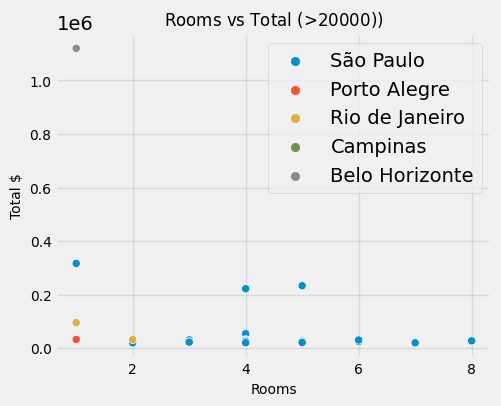

In [74]:
# Scatter plot showing variation of Total Monthly rent with Room for different cities (for total rent > $20000)

plt.figure(figsize = (5,4))
sns.scatterplot(df["rooms"], df["total (R$)"].where(df["total (R$)"]>20000), s= 35, hue = df["city"])
plt.xlabel("Rooms", size = 10, color = "black")
plt.ylabel("Total $", size = 10, color = "black")
plt.title("Rooms vs Total $ ($>20000))", size =12, color = "black")
plt.xticks(color = "black")
plt.yticks(color = "black")
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.grid(color = "grey", alpha = 0.2)
plt.legend()
plt.show()

'\nax3.scatter(df["rooms"], df["total (R$)"].where(df["total (R$)"]>20000), s= 15, color = "red")\nax3.set_xlabel("Rooms", size = 10, color = "black")\nax3.set_ylabel("Total $", size = 10, color = "black")\nax3.set_title("Rooms vs Total $ ($>20000))", size =12, color = "black")\nax3.grid(color = "grey", alpha = 0.2)\nplt.show()\n'

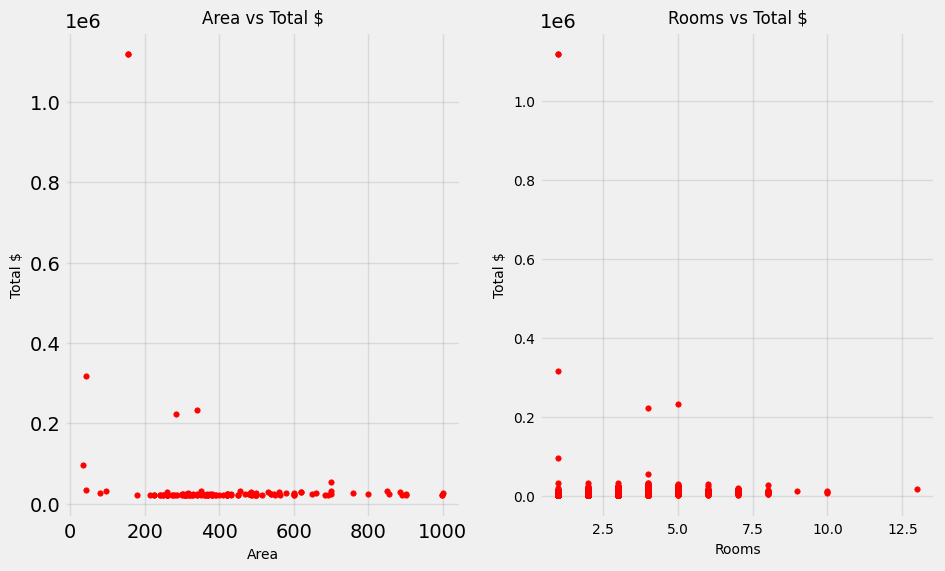

In [73]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# ax3 = fig.add_subplot(2,2,1)

plt.style.use('fivethirtyeight')
ax1.scatter(df["area"], df["total (R$)"].where(df["total (R$)"]>20000), s=15, color = "red")
ax1.set_xlabel("Area", size = 10, color = "black")
ax1.set_ylabel("Total $", size = 10, color = "black")
ax1.set_title("Area vs Total $", size =12, color = "black")
ax1.grid(color = "grey", alpha = 0.2)
plt.xticks(size = 10)
plt.yticks(size = 10)

ax2.scatter(df["rooms"], df["total (R$)"], s = 15, color = "red")
ax2.set_xlabel("Rooms", size = 10, color = "black")
ax2.set_ylabel("Total $", size = 10, color = "black")
ax2.set_title("Rooms vs Total $", size =12, color = "black")
ax2.grid(color = "grey", alpha = 0.2)


'''
ax3.scatter(df["rooms"], df["total (R$)"].where(df["total (R$)"]>20000), s= 15, color = "red")
ax3.set_xlabel("Rooms", size = 10, color = "black")
ax3.set_ylabel("Total $", size = 10, color = "black")
ax3.set_title("Rooms vs Total $ ($>20000))", size =12, color = "black")
ax3.grid(color = "grey", alpha = 0.2)
plt.show()
'''

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0]), [Text(0, 0, '')])

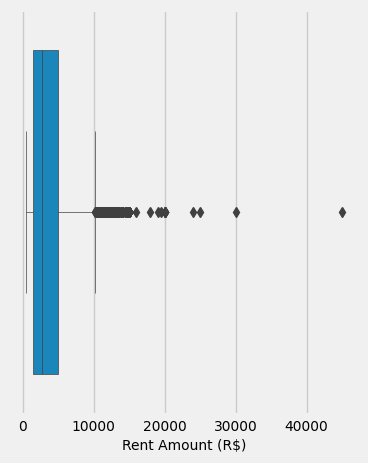

In [72]:
## Boxplots

plt.figure(figsize = (4,5))
sns.boxplot(df["rent amount (R$)"], linewidth = 0.5, orient = "h")
plt.xlabel("Rent Amount (R$)", fontsize = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)

##### The mean rent is somwhere around 2500-3000. There are a lot of outliers for the rent amount.

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0]), [Text(0, 0, '')])

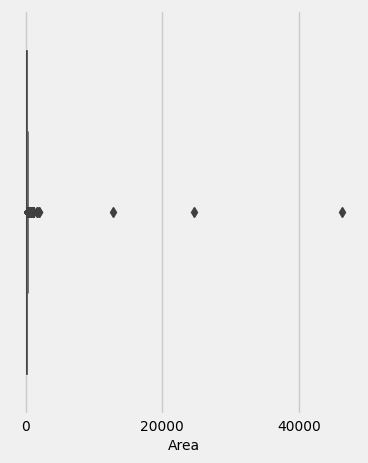

In [68]:
plt.figure(figsize = (4,5))

sns.boxplot(df["area"], linewidth = 0.5, orient = "h")
plt.xlabel("Area", fontsize = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000'),
  Text(0, 7000.0, '7000'),
  Text(0, 8000.0, '8000'),
  Text(0, 9000.0, '9000')])

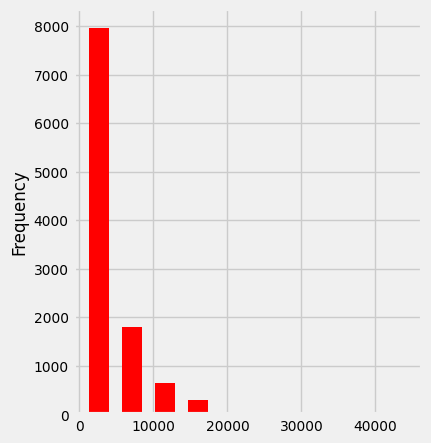

In [67]:
plt.figure(figsize = (4,5))
plt.hist(df["rent amount (R$)"], linewidth = 0.5, color = "red",  rwidth = 0.6)
plt.ylabel("Frequency", size = 12, color = "black")
plt.xticks(size = 10)
plt.yticks(size = 10)

##### This shows that the data is right skewed, and most data points have rent less than 10000

In [45]:
df["rent amount (R$)"].min()

450

In [46]:
#FINDING OUTLIERS

def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    return df[~(df[col]<upper) | (df[col]>lower)].sort_values(col, ascending = True)

In [47]:
outliers(df, "rent amount (R$)")

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10627,Belo Horizonte,22,1,1,0,0,accepted,not furnished,30,450,13,6,499
4022,Belo Horizonte,31,1,1,1,3,not accepted,not furnished,550,460,92,7,1109
6191,Campinas,55,1,1,0,5,accepted,not furnished,473,500,17,7,997
8548,Campinas,55,1,1,0,4,accepted,not furnished,490,500,37,7,1034
3694,Porto Alegre,60,1,1,1,1,accepted,not furnished,316,500,10,8,834
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525,São Paulo,900,3,4,8,0,accepted,not furnished,0,20000,3813,301,24110
2619,São Paulo,80,2,1,1,1,accepted,not furnished,875,24000,0,305,25180
6947,São Paulo,486,8,4,6,0,accepted,not furnished,0,25000,2200,376,27580
7748,São Paulo,350,3,3,3,0,accepted,not furnished,0,30000,560,451,31010


In [48]:
outliers(df, "area")

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
785,São Paulo,11,1,1,0,1,not accepted,furnished,300,2000,42,26,2368
6784,São Paulo,12,1,1,0,0,not accepted,not furnished,0,950,50,13,1013
1588,São Paulo,13,1,1,0,2,accepted,not furnished,0,2200,42,28,2270
4864,São Paulo,13,1,1,0,1,accepted,not furnished,0,2200,5,28,2233
1606,Belo Horizonte,15,1,1,0,0,accepted,not furnished,45,665,0,9,719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5129,Belo Horizonte,2000,4,2,3,0,accepted,not furnished,0,4956,200,82,5238
8790,Belo Horizonte,2000,3,3,2,2,accepted,furnished,3000,5000,200,67,8267
9241,Campinas,12732,3,2,0,3,accepted,not furnished,700,1600,96,21,2417
5915,São Paulo,24606,5,4,4,12,accepted,not furnished,2254,8100,7859,103,18320


In [49]:
df["area"].max(), df["area"].min()

(46335, 11)

<AxesSubplot: >

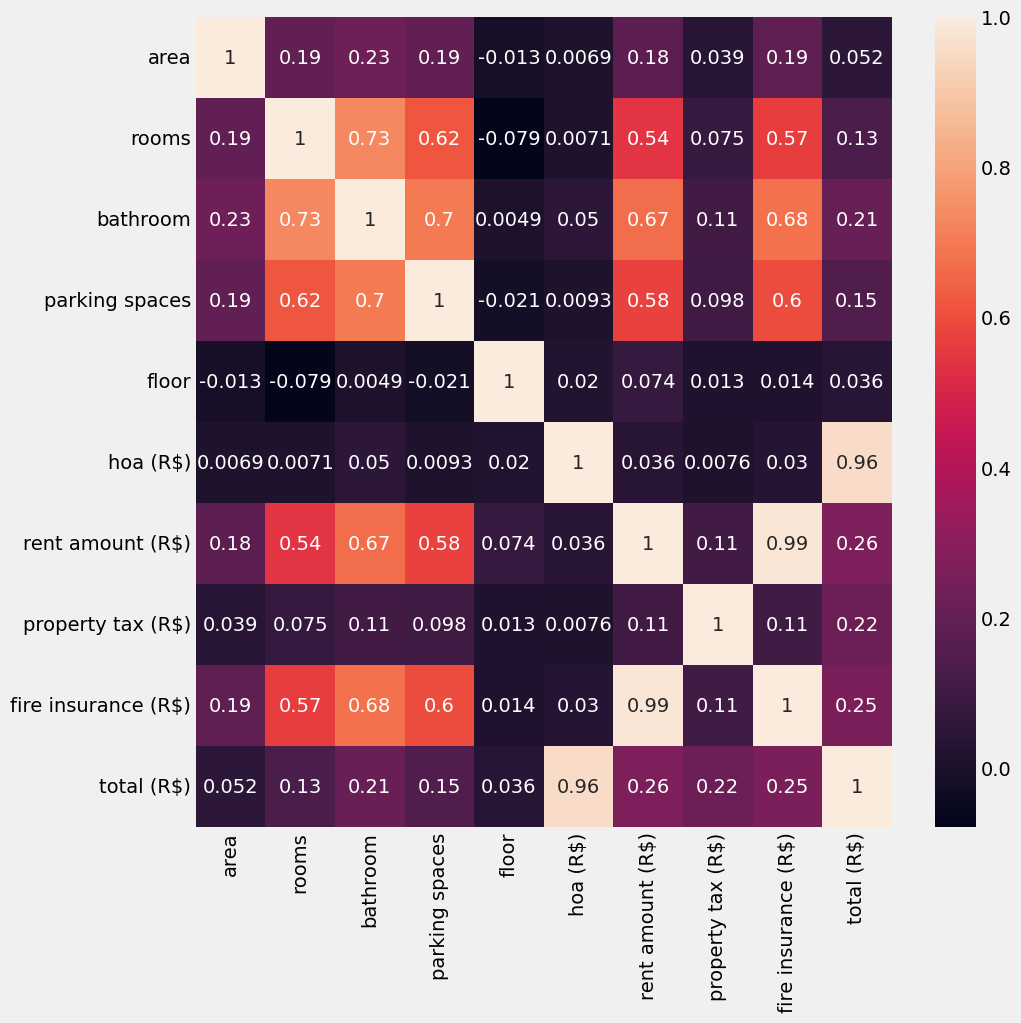

In [50]:
#Correlation Heatmap

plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

##### Doesn't seem like the rent amount and the total amout has a high correlation with other variables. Rent is moderately correlated with rooms, bathrooms, parking spaces which makes sense.

(array([0.0e+00, 5.0e-05, 1.0e-04, 1.5e-04, 2.0e-04, 2.5e-04, 3.0e-04]),
 [Text(0, 0.0, '0.00000'),
  Text(0, 5e-05, '0.00005'),
  Text(0, 0.0001, '0.00010'),
  Text(0, 0.00015000000000000001, '0.00015'),
  Text(0, 0.0002, '0.00020'),
  Text(0, 0.00025, '0.00025'),
  Text(0, 0.00030000000000000003, '0.00030')])

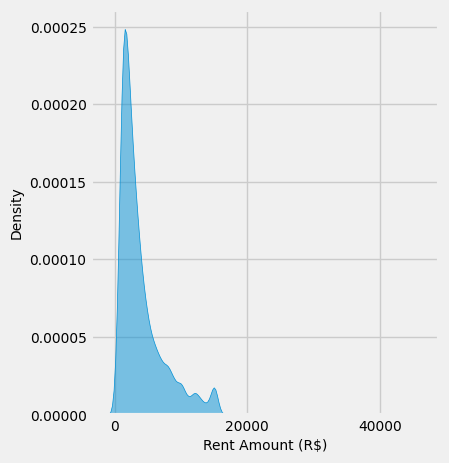

In [82]:
# Exploring the probability distribution of Rent Amount

plt.figure(figsize = (4,5))
sns.kdeplot(df["rent amount (R$)"],  alpha = 0.5, shade = True, linewidth = 0.5)
plt.xlabel("Rent Amount (R$)", fontsize = 10)
plt.ylabel("Density", fontsize = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)

##### Pair Plot

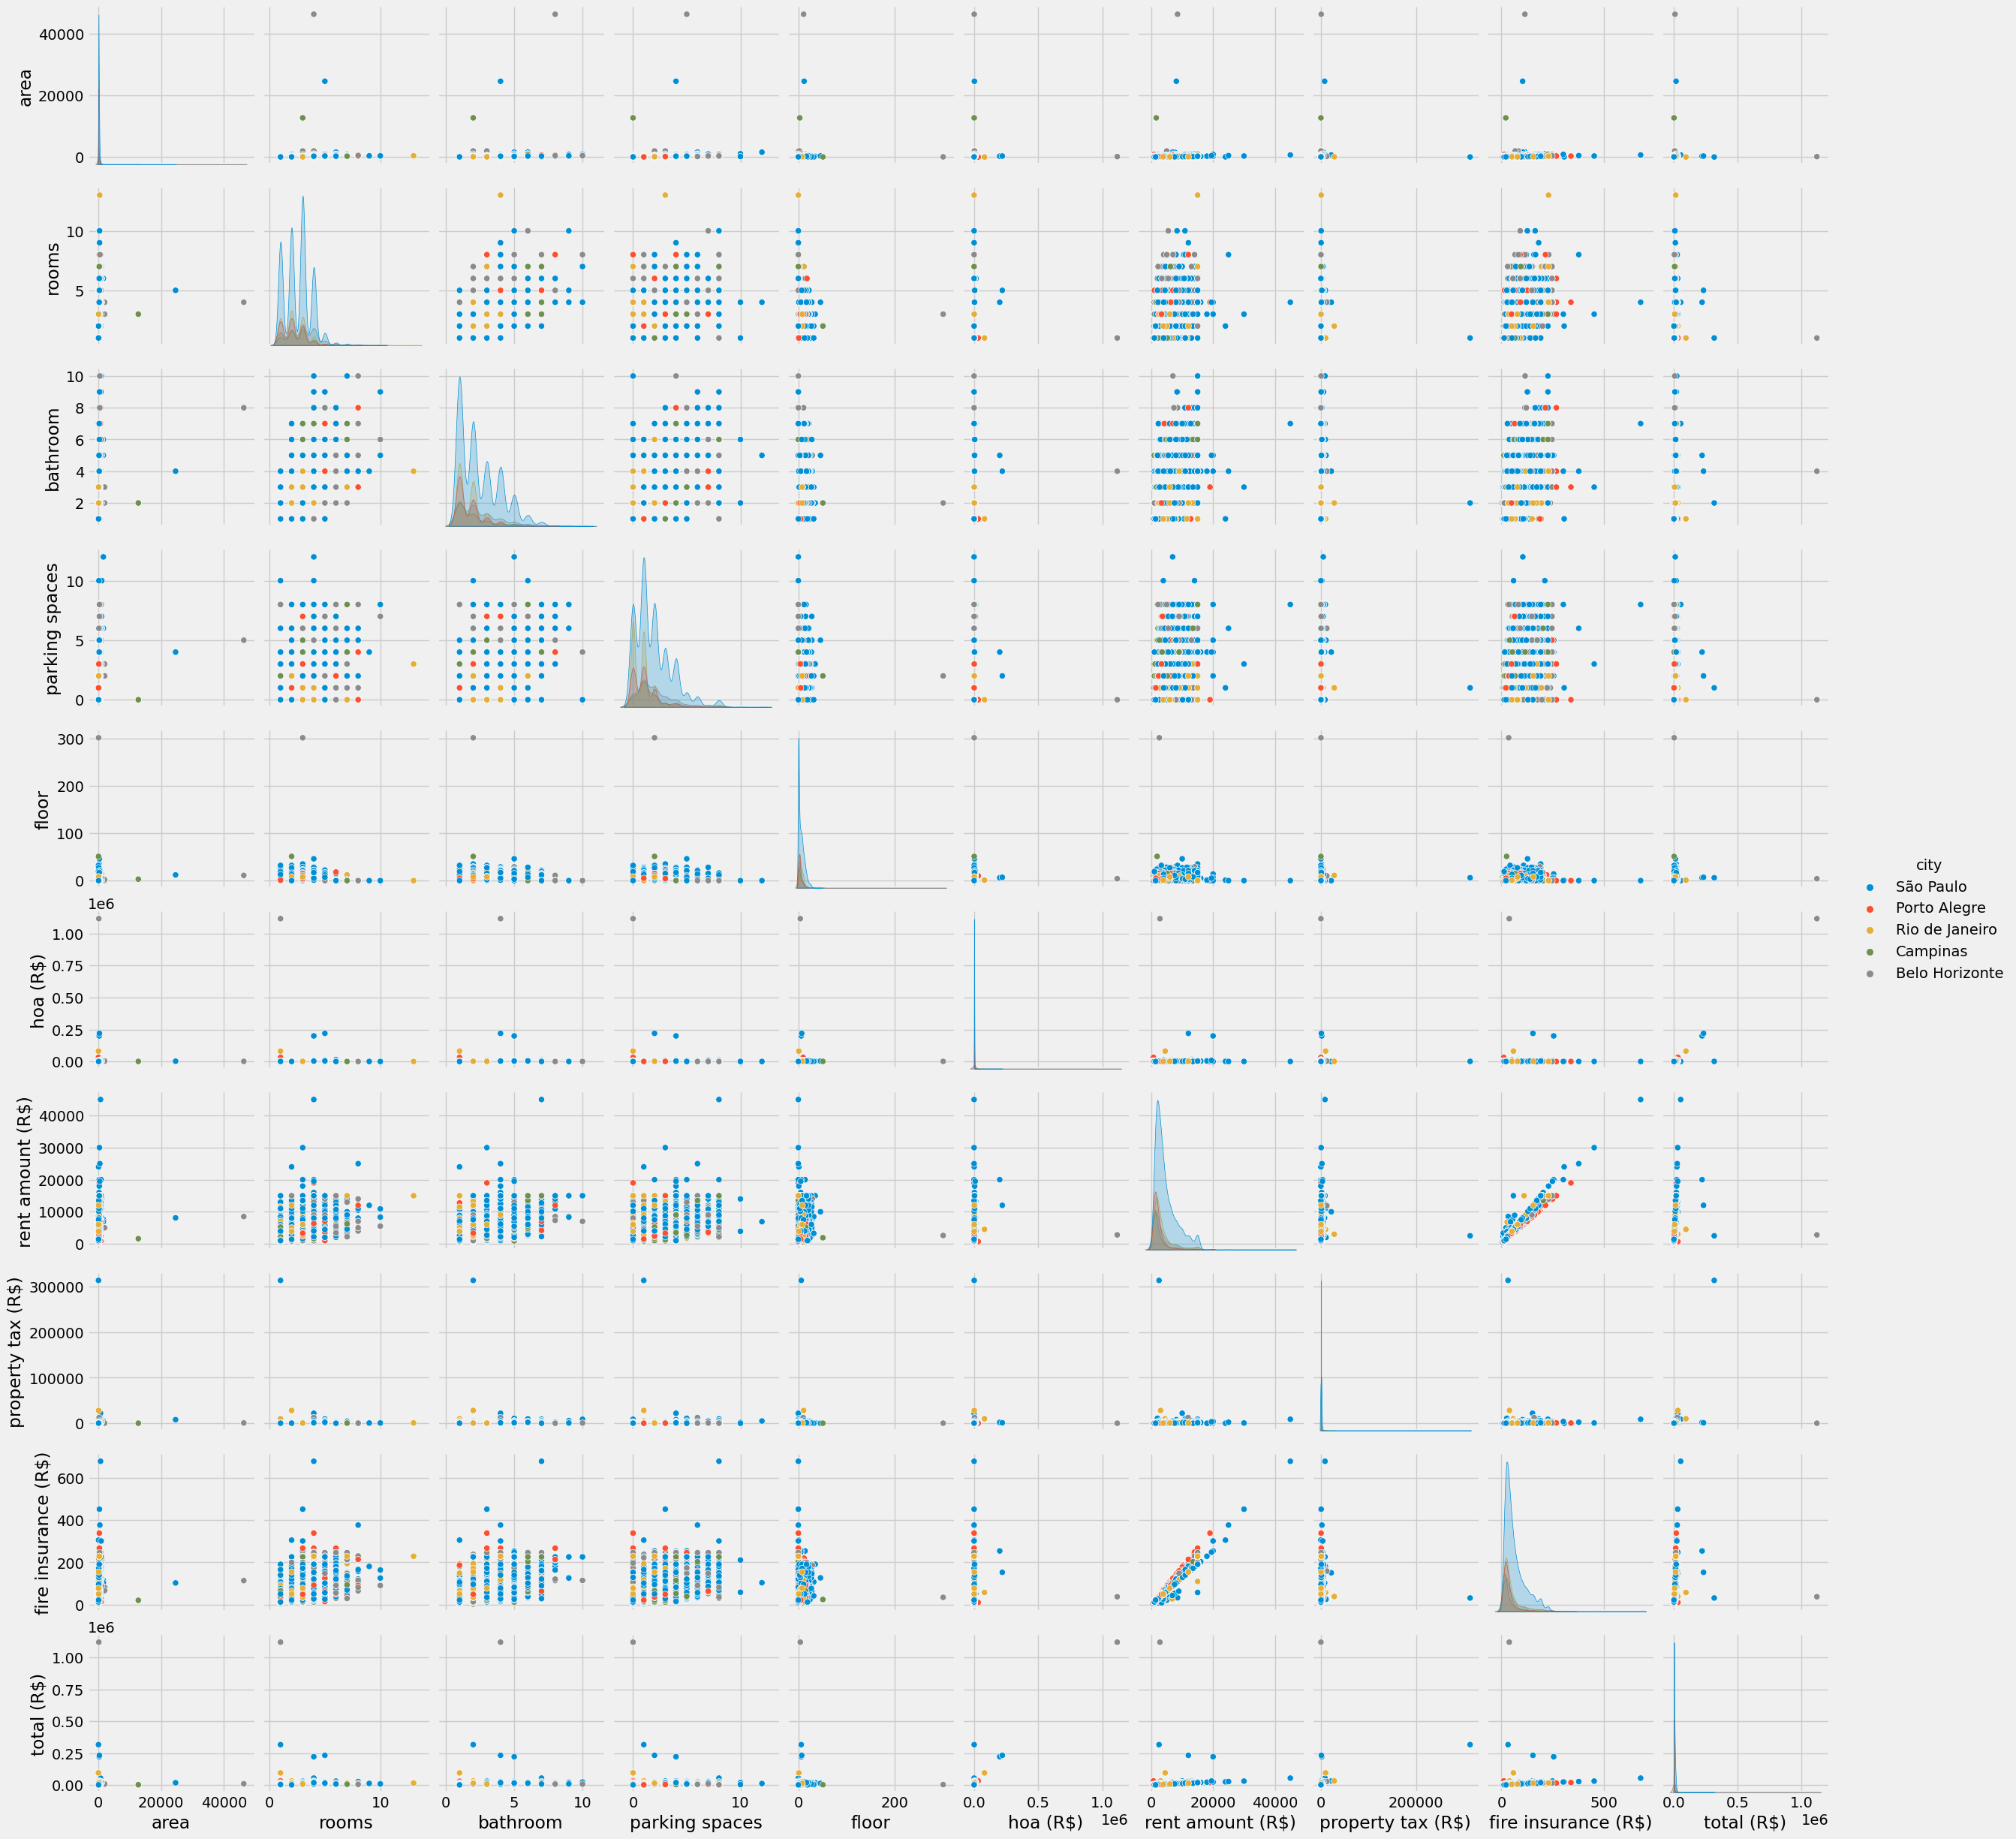

In [83]:
sns.pairplot(df, hue = "city")

##### - The data has a lot of outliers, so for building a regression model to predict the rent amount or total amount, a significant amount of data cleaning and processing would be required.